In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
x = range(1,50)
y = [math.log2(y) for y in x]

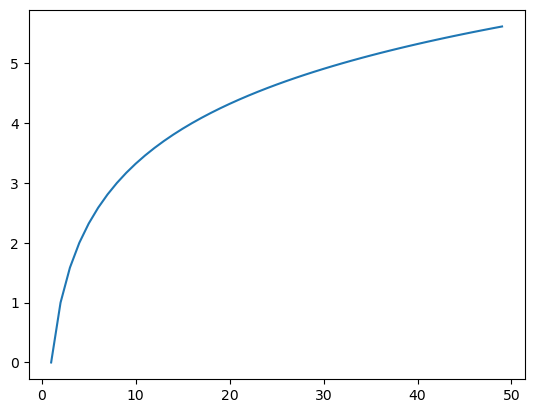

In [3]:
ax = plt.plot(x,y)

In [4]:
for i in x:
    ax = plt.plot(x[:i], y[:i], lw=5)
    plt.xlim((1,50))
    plt.ylim((min(y), max(y)+0.5))

    plt.savefig(f'output/{i:003}', dpi=100, facecolor='white')
    plt.close()

In [5]:
!convert -delay 5 output/*.png test.gif

# Now for the real stuff

In [6]:
import pandas as pd
path_to_file = "/home/kaleb/Desktop/data/2022/MI/HRRR_26_MI_2022-01.csv"
df = pd.read_csv(path_to_file)
df.tail()

,Year,Month,Day,Daily/Monthly,State,County,FIPS Code,Grid Index,Lat (llcrnr),Lon (llcrnr),...,Max Temperature (K),Min Temperature (K),Precipitation (kg m**-2),Relative Humidity (%),Wind Gust (m s**-1),Wind Speed (m s**-1),U Component of Wind (m s**-1),V Component of Wind (m s**-1),Downward Shortwave Radiation Flux (W m**-2),Vapor Pressure Deficit (kPa)
60291,2022,1,28.0,Daily,MICHIGAN,WEXFORD,26165.0,14.0,44.396712,-85.431437,...,264.822,258.770,0.050,64.2,4.647,1.537,-0.137,-0.803,2288.700,0.093
60292,2022,1,29.0,Daily,MICHIGAN,WEXFORD,26165.0,14.0,44.396712,-85.431437,...,266.894,258.888,0.006,63.6,5.314,2.028,-0.413,1.780,1273.500,0.099
60293,2022,1,30.0,Daily,MICHIGAN,WEXFORD,26165.0,14.0,44.396712,-85.431437,...,269.114,264.178,1.359,77.4,4.992,2.006,0.484,0.874,438.600,0.081
60294,2022,1,31.0,Daily,MICHIGAN,WEXFORD,26165.0,14.0,44.396712,-85.431437,...,270.025,262.800,0.026,67.9,4.453,2.143,-0.690,1.662,2372.600,0.120
60295,2022,1,NaN,Monthly,MICHIGAN,NaN,NaN,NaN,NaN,NaN,...,268.618,260.117,103.239,71.2,8.121,3.888,1.321,0.233,176306.703,0.093


In [7]:
# get rid of monthly average
nan_row = df[df['Day'].isna()]
df = df.dropna(subset=['Day'])
df.tail()

,Year,Month,Day,Daily/Monthly,State,County,FIPS Code,Grid Index,Lat (llcrnr),Lon (llcrnr),...,Max Temperature (K),Min Temperature (K),Precipitation (kg m**-2),Relative Humidity (%),Wind Gust (m s**-1),Wind Speed (m s**-1),U Component of Wind (m s**-1),V Component of Wind (m s**-1),Downward Shortwave Radiation Flux (W m**-2),Vapor Pressure Deficit (kPa)
60290,2022,1,27.0,Daily,MICHIGAN,WEXFORD,26165.0,14.0,44.396712,-85.431437,...,269.845,261.432,2.110,75.1,13.055,4.294,1.470,2.604,147.1,0.082
60291,2022,1,28.0,Daily,MICHIGAN,WEXFORD,26165.0,14.0,44.396712,-85.431437,...,264.822,258.770,0.050,64.2,4.647,1.537,-0.137,-0.803,2288.7,0.093
60292,2022,1,29.0,Daily,MICHIGAN,WEXFORD,26165.0,14.0,44.396712,-85.431437,...,266.894,258.888,0.006,63.6,5.314,2.028,-0.413,1.780,1273.5,0.099
60293,2022,1,30.0,Daily,MICHIGAN,WEXFORD,26165.0,14.0,44.396712,-85.431437,...,269.114,264.178,1.359,77.4,4.992,2.006,0.484,0.874,438.6,0.081
60294,2022,1,31.0,Daily,MICHIGAN,WEXFORD,26165.0,14.0,44.396712,-85.431437,...,270.025,262.800,0.026,67.9,4.453,2.143,-0.690,1.662,2372.6,0.120


In [8]:
# divide the dataframe by day
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df = df.drop(['Year', 'Month', 'Day'], axis=1)
array_of_days = [group for _, group in df.groupby(pd.Grouper(key='Date', freq='D'))]

In [9]:
len(array_of_days)

31

Text(0.5, 1.0, 'Michigan Temperature: 2022-01-01')

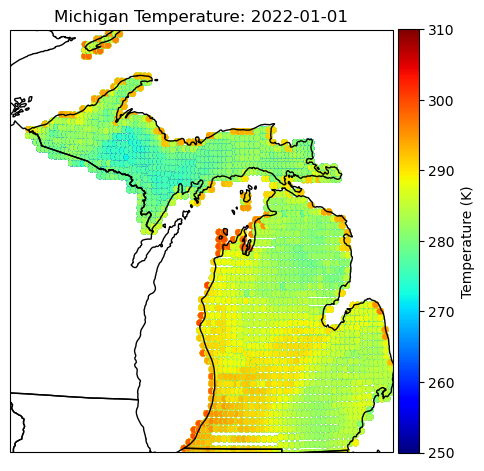

In [52]:
from metpy.plots import USSTATES, USCOUNTIES
import cartopy.crs as ccrs
from shapely.geometry import Point 
from matplotlib.cm import ScalarMappable

proj = ccrs.LambertConformal(central_longitude=-85, central_latitude=44) # center the spherical orientation
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1 ,3 ,1, projection=proj)
# ax.add_feature(USCOUNTIES.with_scale('5m'))


# Calculate the extent based on the minimum and maximum latitude and longitude values
lon_min, lon_max = df['Lon (llcrnr)'].min(), df['Lon (llcrnr)'].max()
lat_min, lat_max = df['Lat (llcrnr)'].min(), df['Lat (llcrnr)'].max()
extent = [lon_min, lon_max, lat_min, lat_max]

ax.set_extent(extent, ccrs.Geodetic())
ax.add_feature(USSTATES.with_scale('5m'))

cmap = plt.cm.get_cmap('jet')
ax.scatter(df['Lon (llcrnr)'], df['Lat (llcrnr)'], c=df['Avg Temperature (K)'],
           cmap=cmap, transform=ccrs.PlateCarree(), s=15)

sm = ScalarMappable(cmap=cmap)
sm.set_array(df['Avg Temperature (K)'])
sm.set_clim(vmin=250, vmax=310)
plt.colorbar(sm, ax=ax, pad=0.01, shrink=0.55, ticks=[250, 260, 270, 280, 290, 300, 310], 
             label='Temperature (K)')

ax.set_title('Michigan Temperature: ' + str(df['Date'].iloc[0].date()))
# cmap = plt.cm.get_cmap('jet')
# norm = plt.Normalize(vmin=260, vmax=310)

# scatter = ax.scatter(df['Lon (llcrnr)'], df['Lat (llcrnr)'], c=df['Avg Temperature (K)'], cmap=cmap, norm=norm)
# plt.colorbar(ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', pad=0.01, shrink=0.8,
#              ticks=[260, 270, 280, 290, 300, 310], label='Temperature (K)')




In [47]:
i = 0
for d in array_of_days:
    proj = ccrs.LambertConformal(central_longitude=-85, central_latitude=44) # center the spherical orientation
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1 ,3 ,1, projection=proj)
    # ax.add_feature(USCOUNTIES.with_scale('5m'))


    # Calculate the extent based on the minimum and maximum latitude and longitude values
    lon_min, lon_max = d['Lon (llcrnr)'].min(), d['Lon (llcrnr)'].max()
    lat_min, lat_max = d['Lat (llcrnr)'].min(), d['Lat (llcrnr)'].max()
    extent = [lon_min, lon_max, lat_min, lat_max]

    ax.set_extent(extent, ccrs.Geodetic())
    ax.add_feature(USSTATES.with_scale('5m'))

    cmap = plt.cm.get_cmap('jet')
    ax.scatter(d['Lon (llcrnr)'], d['Lat (llcrnr)'], c=d['Avg Temperature (K)'],
            cmap=cmap, transform=ccrs.PlateCarree(), s=10)

    sm = ScalarMappable(cmap=cmap)
    sm.set_array(d['Avg Temperature (K)'])
    sm.set_clim(vmin=250, vmax=310)
    plt.colorbar(sm, ax=ax, pad=0.01, shrink=0.55, ticks=[250, 260, 270, 280, 290, 300, 310], 
                label='Temperature (K)')

    ax.set_title('Michigan Temperature: ' + str(d['Date'].iloc[0].date()))
    plt.savefig(f'wrf/{i:003}')
    plt.close()
    i+=1

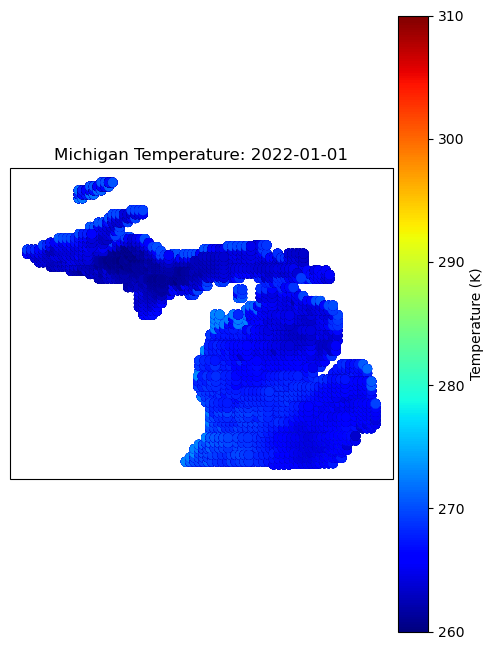

In [35]:
ax = plt.scatter(df['Lon (llcrnr)'], df['Lat (llcrnr)'], c=df['Avg Temperature (K)'], cmap=cmap,
                     vmin=260, vmax=310)
plt.colorbar(orientation='vertical', pad=0.01, shrink=0.8,
                ticks=[260, 270, 280, 290, 300, 310], label='Temperature (K)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Michigan Temperature: ' + str(df['Date'].iloc[0].date()))
ax.add_feature(USSTATES.with_scale('5m'))

In [47]:
cmap = plt.cm.get_cmap('jet')

# plt.scatter(df['Lon (llcrnr)'], df['Lat (llcrnr)'], c=df['Avg Temperature (K)'], cmap='coolwarm')
i = 0
for d in array_of_days:
    ax = plt.scatter(d['Lon (llcrnr)'], d['Lat (llcrnr)'], c=d['Avg Temperature (K)'], cmap=cmap,
                     vmin=260, vmax=310)
    plt.colorbar(orientation='vertical', pad=0.01, shrink=0.8,
                 ticks=[260, 270, 280, 290, 300, 310], label='Temperature (K)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Michigan Temperature: ' + str(d['Date'].iloc[0].date()))
    plt.savefig(f'wrf/{i:003}')
    plt.close()
    i+=1

In [48]:
!convert -delay 30 wrf/*.png wrf_test.gif

# Animate enture US
animate the entire continential united states with data based on the daily files

In [2]:
from metpy.plots import USSTATES, USCOUNTIES
import cartopy.crs as ccrs
from shapely.geometry import Point 
from matplotlib.cm import ScalarMappable
import pandas as pd
import matplotlib.pyplot as plt


full_dir = "/home/kaleb/Desktop/canpc40/testing_changes_6-15/daily_data/2020/LA/HRRR_22_LA_2020-01.csv"
df = pd.read_csv(full_dir, index_col=False)
df.head()

,Year,Month,Day,Hour,Daily/Monthly,State,County,FIPS Code,Grid Index,Lat (llcrnr),Lon (llcrnr),Lat (urcrnr),Lon (urcrnr),Avg Temperature (K),Precipitation (kg m**-2),Relative Humidity (%),Wind Gust (m s**-1),U Component of Wind (m s**-1),V Component of Wind (m s**-1),Downward Shortwave Radiation Flux (W m**-2)
0,2020,1,1,0,Daily,LOUISIANA,ASSUMPTION,22007,0,29.736389,-91.259388,29.846409,-91.134788,286.552734,0.0,36.1,4.176131,2.774557,1.217583,0.0
1,2020,1,1,0,Daily,LOUISIANA,ASSUMPTION,22007,1,29.846409,-91.259388,29.956429,-91.134788,288.427734,0.0,34.6,1.801131,2.212057,-0.969917,0.0
2,2020,1,1,0,Daily,LOUISIANA,ASSUMPTION,22007,2,29.956429,-91.259388,30.066450,-91.134788,286.052734,0.0,26.7,2.301131,2.337057,-2.032417,0.0
3,2020,1,1,0,Daily,LOUISIANA,ASSUMPTION,22007,3,29.626368,-91.134788,29.736389,-91.010189,284.115234,0.0,60.9,4.551131,3.212057,2.905083,0.0
4,2020,1,1,0,Daily,LOUISIANA,ASSUMPTION,22007,4,29.736389,-91.134788,29.846409,-91.010189,285.615234,0.0,42.1,3.551131,2.274557,1.780083,0.0


In [3]:
# sort the df by year, month, day, hour
df = df.sort_values(by=['Year', 'Month', 'Day', 'Hour'])
df.tail()

,Year,Month,Day,Hour,Daily/Monthly,State,County,FIPS Code,Grid Index,Lat (llcrnr),Lon (llcrnr),Lat (urcrnr),Lon (urcrnr),Avg Temperature (K),Precipitation (kg m**-2),Relative Humidity (%),Wind Gust (m s**-1),U Component of Wind (m s**-1),V Component of Wind (m s**-1),Downward Shortwave Radiation Flux (W m**-2)
151910,2020,1,4,23,Daily,LOUISIANA,CALDWELL,22021,11,32.160726,-91.995421,32.277441,-91.889687,286.203308,0.0,29.6,6.149941,4.092828,-4.718274,16.6
151913,2020,1,4,23,Daily,LOUISIANA,EAST FELICIANA,22037,0,30.649548,-91.320706,30.766152,-91.221731,286.390808,0.0,53.4,8.212441,5.217828,-6.530774,18.9
151916,2020,1,4,23,Daily,LOUISIANA,EAST FELICIANA,22037,1,30.766152,-91.320706,30.882756,-91.221731,286.015808,0.0,51.2,7.524941,4.905328,-6.280774,18.1
151919,2020,1,4,23,Daily,LOUISIANA,EAST FELICIANA,22037,2,30.649548,-91.221731,30.766152,-91.122755,286.640808,0.0,50.4,7.774941,5.217828,-6.655774,18.0
151922,2020,1,4,23,Daily,LOUISIANA,EAST FELICIANA,22037,3,30.766152,-91.221731,30.882756,-91.122755,286.140808,0.0,49.5,6.524941,4.905328,-6.468274,17.2


In [4]:
# change the date to datetime
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
df['Date'].iloc[13671].hour


4

In [5]:
# made an array of hour dfs
df_arr = [group for _, group in df.groupby(pd.Grouper(key='Date', freq='H'))]
len(df_arr)

96

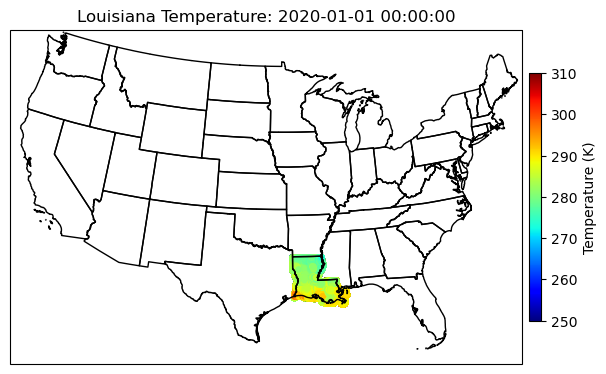

In [11]:
proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=37.5) # center the spherical orientation
fig = plt.figure()
ax = fig.add_subplot(1 ,1 ,1, projection=proj)
extent = [241, 286, 22, 50]

ax.set_extent(extent, ccrs.Geodetic())
ax.add_feature(USSTATES.with_scale('5m'))

cmap = plt.cm.get_cmap('jet')
ax.scatter(df['Lon (llcrnr)'], df['Lat (llcrnr)'], c=df['Avg Temperature (K)'],
           cmap=cmap, transform=ccrs.PlateCarree(), s=15)

sm = ScalarMappable(cmap=cmap)
sm.set_array(df['Avg Temperature (K)'])
sm.set_clim(vmin=250, vmax=310)
plt.colorbar(sm, ax=ax, pad=0.01, shrink=0.55, ticks=[250, 260, 270, 280, 290, 300, 310], 
             label='Temperature (K)')

ax.set_title('Louisiana Temperature: ' + str(df['Date'].iloc[0]))
plt.tight_layout()
plt.savefig('img2')



In [12]:
i=0
for d in df_arr:
    proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=37.5) # center the spherical orientation
    # fig = plt.figure(figsize=(20,10))
    fig = plt.figure()
    ax = fig.add_subplot(1 ,1 ,1, projection=proj)
    extent = [241, 286, 22, 50]

    ax.set_extent(extent, ccrs.Geodetic())
    ax.add_feature(USSTATES.with_scale('5m'))

    cmap = plt.cm.get_cmap('jet')
    ax.scatter(d['Lon (llcrnr)'], d['Lat (llcrnr)'], c=d['Avg Temperature (K)'],
            cmap=cmap, transform=ccrs.PlateCarree(), s=15)

    sm = ScalarMappable(cmap=cmap)
    sm.set_array(d['Avg Temperature (K)'])
    sm.set_clim(vmin=250, vmax=310)
    plt.colorbar(sm, ax=ax, pad=0.01, shrink=0.55, ticks=[250, 260, 270, 280, 290, 300, 310], 
                label='Temperature (K)')

    ax.set_title('Louisiana Temperature: ' + str(d['Date'].iloc[0]))
    plt.tight_layout()
    plt.savefig(f'wrf/{i:003}')
    plt.close()
    i+=1

In [13]:
!convert -delay 20 wrf/*.png wrf_test.gif

# PLOT HOURLY DATA ACROSS ENTIRE US

## for new parameter change: 

- param
- cmap color
- set_clim
- colorbar ticks
- file name when making into gif

In [16]:
from metpy.plots import USSTATES, USCOUNTIES
import cartopy.crs as ccrs
from shapely.geometry import Point 
from matplotlib.cm import ScalarMappable
import pandas as pd
import matplotlib.pyplot as plt
import os

In [26]:
year_dir = "/media/kaleb/extraSpace/crop/daily_data/2022/"
yyyymmdd = "20220101"
param = 'Precipitation (kg m**-2)'

all_data = []
month = yyyymmdd[4:6]
day = yyyymmdd[6:8]

for state_dir in os.listdir(year_dir):
    state_path = os.path.join(year_dir, state_dir)

    # iteratore over the files in the dir
    for file in os.listdir(state_path):

        # if the filename has the month we're looking for
        if month in file:
            file_path = os.path.join(state_path, file) # full path to file
            df = pd.read_csv(file_path, index_col=False)

            # to minimize space, only append the necessary columns
            df['Lat'] = (df['Lat (llcrnr)'] + df['Lat (urcrnr)']) / 2
            df['Lon'] = (df['Lon (llcrnr)'] + df['Lon (urcrnr)']) / 2

            # df['Day'] = pd.to_numeric(df['Day']) # convert to int if stored as str
            # df = df[df['Day'] == day]

            df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])

            df = df[['Date', 'Lat', 'Lon', param]]
            all_data.append(df)

combined_df = pd.concat(all_data)
combined_df = combined_df.reset_index(drop=True)
combined_df.head()


,Date,Lat,Lon,Avg Temperature (K)
0,2022-01-01,34.373874,-88.127634,294.707001
1,2022-01-01,34.512427,-88.127634,294.332001
2,2022-01-01,34.373874,-88.035640,294.269501
3,2022-01-01,34.512427,-88.035640,294.207001
4,2022-01-01,34.373874,-87.943645,294.082001


In [27]:
df = combined_df
df = df.sort_values(by=['Date'])
df.tail()

,Date,Lat,Lon,Avg Temperature (K)
2869398,2022-01-09 23:00:00,34.026254,-120.275343,286.372131
7059132,2022-01-09 23:00:00,32.512604,-91.984113,286.559631
17146479,2022-01-09 23:00:00,45.315450,-97.462353,260.059631
313861,2022-01-09 23:00:00,34.368251,-86.942127,286.434631
13104785,2022-01-09 23:00:00,35.350234,-108.307044,277.684631


In [29]:
# chop it down to first 5 days
new_df = df.set_index('Date')
new_df = new_df['2022-01-01':'2022-01-05']
new_df.reset_index(inplace=True)
df = new_df
new_df.tail()

,Date,Lat,Lon,Avg Temperature (K)
12126715,2022-01-05 23:00:00,33.997274,-117.409808,296.249313
12126716,2022-01-05 23:00:00,45.914048,-68.868949,274.249313
12126717,2022-01-05 23:00:00,43.146648,-121.220117,275.874313
12126718,2022-01-05 23:00:00,47.073742,-69.311771,270.124313
12126719,2022-01-05 23:00:00,36.627045,-117.093486,284.624313


In [30]:
# made an array of hour dfs
df_arr = [group for _, group in df.groupby(pd.Grouper(key='Date', freq='H'))]
len(df_arr)

120

In [31]:

lon_min, lon_max = combined_df['Lon'].min(), combined_df['Lon'].max()
lat_min, lat_max = combined_df['Lat'].min() - 3, combined_df['Lat'].max()

# calculate the average to find the center
lat_avg, lon_avg = combined_df['Lat'].mean(), combined_df['Lon'].mean()
extent = [lon_min, lon_max, lat_min, lat_max]


i=0
for d in df_arr:
    proj = ccrs.LambertConformal(central_longitude=lon_avg, central_latitude=lat_avg) # center the spherical orientation
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection=proj)
    ax.set_extent(extent, ccrs.Geodetic())
    ax.add_feature(USSTATES.with_scale('5m'))

    cmap = plt.cm.get_cmap('blues') # viridis, plasma, cool, jet, twilight_shifted, greys
    ax.scatter(d['Lon'], d['Lat'], c=d[param],
            cmap=cmap, transform=ccrs.PlateCarree(), s=1)

    sm = ScalarMappable(cmap=cmap)
    sm.set_array(d[param])
    sm.set_clim(vmin=0, vmax=25)
    plt.colorbar(sm, ax=ax, pad=0.01, shrink=0.55, ticks=[0, 5, 10, 15, 20, 25], 
                label=param)
    plt.title(param + '\nDate: ' + str(d['Date'].iloc[0]) + ' UTC')
    plt.tight_layout()
    plt.savefig(f'wrf/{i:003}')
    plt.close()
    i+=1
    


In [32]:
!convert -delay 20 wrf/*.png wrf_tmp.gif

5239.65s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [2]:
from metpy.plots import USSTATES, USCOUNTIES
import cartopy.crs as ccrs
from shapely.geometry import Point 
from matplotlib.cm import ScalarMappable
import pandas as pd
import matplotlib.pyplot as plt
import os

year_dir = "/media/kaleb/extraSpace/crop/daily_data/2022/"
yyyymmdd = "20220101"
param = 'Avg Temperature (K)'

all_data = []
month = yyyymmdd[4:6]
day = yyyymmdd[6:8]

for state_dir in os.listdir(year_dir):
    state_path = os.path.join(year_dir, state_dir)

    # iteratore over the files in the dir
    for file in os.listdir(state_path):

        # if the filename has the month we're looking for
        if month in file:
            file_path = os.path.join(state_path, file) # full path to file
            df = pd.read_csv(file_path, index_col=False)

            # to minimize space, only append the necessary columns
            df['Lat'] = (df['Lat (llcrnr)'] + df['Lat (urcrnr)']) / 2
            df['Lon'] = (df['Lon (llcrnr)'] + df['Lon (urcrnr)']) / 2

            # df['Day'] = pd.to_numeric(df['Day']) # convert to int if stored as str
            # df = df[df['Day'] == day]

            df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])

            df = df[['Date', 'Lat', 'Lon', param]]
            df = df.set_index('Date')
            df = df['2022-01-01':'2022-01-04']
            df.reset_index(inplace=True)
            all_data.append(df)

combined_df = pd.concat(all_data)
combined_df = combined_df.reset_index(drop=True)

df = combined_df
df = df.sort_values(by=['Date'])


# chop it down to first 5 days
new_df = df.set_index('Date')
new_df = new_df['2022-01-01':'2022-01-04']
new_df.reset_index(inplace=True)
df = new_df
df = df.sort_values(by='Date')

# made an array of hour dfs
df_arr = [group for _, group in df.groupby(pd.Grouper(key='Date', freq='H'))]

lon_min, lon_max = combined_df['Lon'].min(), combined_df['Lon'].max()
lat_min, lat_max = combined_df['Lat'].min() - 3, combined_df['Lat'].max()

# calculate the average to find the center
lat_avg, lon_avg = combined_df['Lat'].mean(), combined_df['Lon'].mean()
extent = [lon_min, lon_max, lat_min, lat_max]


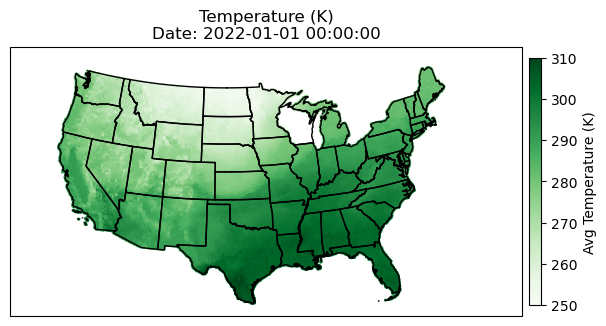

In [8]:
i=0
for d in df_arr:
    proj = ccrs.LambertConformal(central_longitude=lon_avg, central_latitude=lat_avg) # center the spherical orientation
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection=proj)
    ax.set_extent(extent, ccrs.Geodetic())
    ax.add_feature(USSTATES.with_scale('5m'))

    cmap = plt.cm.get_cmap('Greens') # viridis, plasma, cool, jet, twilight_shifted, greys, blues
    ax.scatter(d['Lon'], d['Lat'], c=d[param],
            cmap=cmap, transform=ccrs.PlateCarree(), s=1)

    sm = ScalarMappable(cmap=cmap)
    sm.set_array(d[param])
    sm.set_clim(vmin=250, vmax=310)
    plt.colorbar(sm, ax=ax, pad=0.01, shrink=0.55, ticks=[250, 260, 270, 280, 290, 300, 310], 
                label=param)
    plt.title('Temperature (K)\nDate: ' + str(d['Date'].iloc[0]))
    plt.tight_layout()
    break

In [12]:
for file in os.listdir('wrf/'):
    !convert file -crop 610x340+10+50 file

convert: unable to open image 'file': No such file or directory @ error/blob.c/OpenBlob/3569.
convert: no decode delegate for this image format `' @ error/constitute.c/ReadImage/741.
convert: no images defined `file' @ error/convert.c/ConvertImageCommand/3342.
convert: unable to open image 'file': No such file or directory @ error/blob.c/OpenBlob/3569.
convert: no decode delegate for this image format `' @ error/constitute.c/ReadImage/741.
convert: no images defined `file' @ error/convert.c/ConvertImageCommand/3342.
convert: unable to open image 'file': No such file or directory @ error/blob.c/OpenBlob/3569.
convert: no decode delegate for this image format `' @ error/constitute.c/ReadImage/741.
convert: no images defined `file' @ error/convert.c/ConvertImageCommand/3342.
convert: unable to open image 'file': No such file or directory @ error/blob.c/OpenBlob/3569.
convert: no decode delegate for this image format `' @ error/constitute.c/ReadImage/741.
convert: no images defined `file' 

UnboundLocalError: local variable 'child' referenced before assignment